# Reducción de dimensionalidad con PCA

En este cuaderno se aplica el Análisis de Componentes Principales (PCA) al conjunto de datos Iris. Se reduce la dimensionalidad a dos componentes y se muestran las proporciones de varianza explicada y un diagrama de dispersión de las nuevas componentes.


Varianza explicada por cada componente: [0.72962445 0.22850762]
Varianza explicada acumulada: 0.9581320720000166


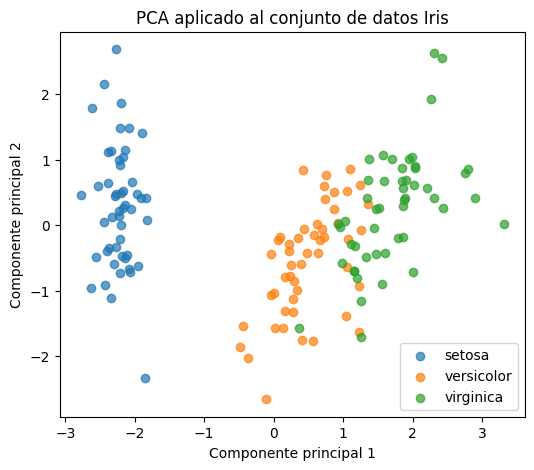

In [1]:

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Cargar datos
iris = load_iris()
X = iris.data
y = iris.target

# Estandarizar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print('Varianza explicada por cada componente:', pca.explained_variance_ratio_)
print('Varianza explicada acumulada:', pca.explained_variance_ratio_.sum())

# Crear DataFrame para graficar
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['species'] = y

# Visualizar
plt.figure(figsize=(6, 5))
for species in range(3):
    subset = pca_df[pca_df['species'] == species]
    plt.scatter(subset['PC1'], subset['PC2'], label=iris.target_names[species], alpha=0.7)
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('PCA aplicado al conjunto de datos Iris')
plt.legend()
plt.show()
